# Data

In [2]:
with open("data/shakespeare.txt", mode="r", encoding="utf-8") as f:
    text = f.read()

In [3]:
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [4]:
print(f"# chars: {len(text)}")

# chars: 1115394


In [5]:
vocab = sorted(list(set(text)))

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

"".join(vocab)

Vocab size: 65


"\n !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [6]:
char_to_int = {c: i for (i, c) in enumerate(vocab)}
int_to_char = {i: c for (i, c) in enumerate(vocab)}

encode = lambda chars: [char_to_int[c] for c in chars]
decode = lambda ints: "".join([int_to_char[i] for i in ints])

test_text = "hello world"
encoded_text = encode(test_text)
print(encoded_text)
print(decode(encoded_text))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [7]:
import torch

data = torch.tensor(encode(text), dtype=torch.int64)
print(data.shape)

data[:500]

torch.Size([1115394])


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [8]:
val_split = 0.1
n_val_samples = int(len(data) * val_split)

val_data = data[:n_val_samples]
train_data = data[n_val_samples:]

val_data.shape, train_data.shape

(torch.Size([111539]), torch.Size([1003855]))

In [9]:
block_size = 8
train_data[:block_size + 1]

tensor([43, 58,  6,  1, 25, 39, 56, 41, 47])

In [10]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

print(x, y)

for i in range(block_size):
    print(f"{x[:i+1], y[i]}")

tensor([43, 58,  6,  1, 25, 39, 56, 41]) tensor([58,  6,  1, 25, 39, 56, 41, 47])
(tensor([43]), tensor(58))
(tensor([43, 58]), tensor(6))
(tensor([43, 58,  6]), tensor(1))
(tensor([43, 58,  6,  1]), tensor(25))
(tensor([43, 58,  6,  1, 25]), tensor(39))
(tensor([43, 58,  6,  1, 25, 39]), tensor(56))
(tensor([43, 58,  6,  1, 25, 39, 56]), tensor(41))
(tensor([43, 58,  6,  1, 25, 39, 56, 41]), tensor(47))


In [11]:
batch_size = 4

def get_batch(data):
    inds = torch.randint(len(data) - block_size - 1, size=(batch_size,))
    x = torch.stack([data[i:i+block_size] for i in inds])
    y = torch.stack([data[i+1:i+block_size+1] for i in inds])
    return x, y

x, y = get_batch(train_data)

print(x.shape)
print(x)

print(y.shape)
print(y)

torch.Size([4, 8])
tensor([[ 1, 35, 46, 39, 58,  1, 61, 53],
        [ 6,  0, 32, 46, 43,  1, 44, 39],
        [11,  0, 13, 52, 42,  1, 57, 54],
        [ 1, 40, 47, 45,  6,  1, 52, 53]])
torch.Size([4, 8])
tensor([[35, 46, 39, 58,  1, 61, 53, 59],
        [ 0, 32, 46, 43,  1, 44, 39, 58],
        [ 0, 13, 52, 42,  1, 57, 54, 59],
        [40, 47, 45,  6,  1, 52, 53, 56]])


# Bigram model

In [12]:
import torch.nn as nn
from torch.nn import functional as F

class BigramModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, inputs, targets=None):
        # inputs and targets are (B, T).
        logits = self.token_embedding(inputs)  # (B, T, C).
        
        loss = None
        
        # Calc cross-entropy loss.
        if targets != None:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)

            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss
    
    def generate(self, tokens, n_tokens):
        for i in range(n_tokens):
            logits, _ = self(tokens)  # (B, T, C)
            logits = logits[:, -1, :]  # only use last pred col. (B, C)
            
            probs = F.softmax(logits, dim=-1)
            next_tokens = torch.multinomial(probs, num_samples=1)
            
            tokens = torch.cat((tokens, next_tokens), dim=-1)  # append. (B, T+1)
        
        return tokens

In [13]:
bigram_model = BigramModel(vocab_size)
logits, loss = bigram_model(x, y)
logits.shape, loss.shape

(torch.Size([32, 65]), torch.Size([]))

In [14]:
import math

print(loss)
print(math.log(65))  # -ln(e^x/sum(e^x)) -> -ln(1/65) -> ln(65)

tensor(4.5835, grad_fn=<NllLossBackward0>)
4.174387269895637


In [15]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=100)[0]

print(decode(tokens.tolist()))


vdJtB:?&-nJJ,iG -n$Qth.
etxjJ'Wll'$3M&LOoGxsTkf$:hNLimpSVChXbxgUWroYGFXn.yMBuj-Zxgl,,ArOAeTEgh3CTmT;


In [16]:
optimizer = torch.optim.Adam(bigram_model.parameters(), lr=1e-3)

batch_size = 32

losses = []
for steps in range(10_000):
    xb, yb = get_batch(train_data)
    
    logits, loss = bigram_model(xb, targets=yb)
    losses.append(loss.item())
    
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
print(losses[-1])

2.4220447540283203


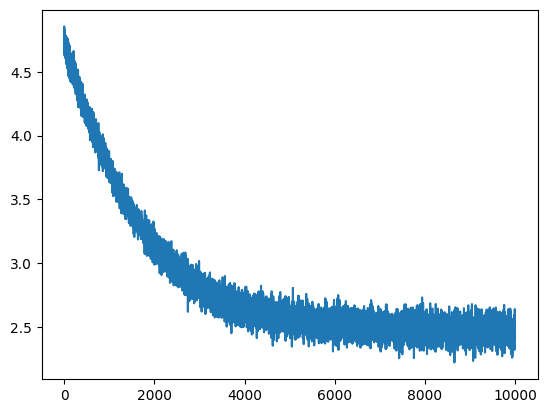

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [18]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=500)[0]

print(decode(tokens.tolist()))


'st me feedik, KERDUCENERYomaKETHENTits, tovaitou GBorier Foupotout
MHENZon ado's RBanghemplevely aneng, d thin;
Wha es; ss'this br yoos
Thichancy he, whe:
So psthevajWe hesheay hers upe I myeat wefirshe alsto stiet; hisorete
AURWhr ch wn cad louns pour d s y.
so ol.
Tongapriven;
Wioo yfirer. l oke taper keang k.
Bucchhamy n imy.
Toret urthathu ano!
MEYot l h l;
LOfer, ts averen. couser l lam, d g y it, as nth hilyoug t illed ug ht bofith'disthe f IIf?
' he wor my t, l lfrey sigefowe.
An owndous


# Attention (math trick)

In [19]:
B, T, C = 4, 8, 2

x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

In [20]:
x_bow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        x_prev = x[b, :t+1]
        x_bow[b, t] = torch.mean(x_prev, 0)  # average all previous values together (channels separate).

In [21]:
x[0], x_bow[0]

(tensor([[ 0.5259, -0.7565],
         [ 0.5586, -0.2998],
         [-0.2214,  1.1417],
         [ 0.5534, -0.6153],
         [-0.6387, -0.8655],
         [ 0.3543, -0.7614],
         [-1.0768,  0.4716],
         [-1.8210, -1.0345]]),
 tensor([[ 0.5259, -0.7565],
         [ 0.5422, -0.5281],
         [ 0.2877,  0.0285],
         [ 0.3541, -0.1325],
         [ 0.1556, -0.2791],
         [ 0.1887, -0.3595],
         [ 0.0079, -0.2407],
         [-0.2207, -0.3400]]))

In [22]:
a = torch.tril(torch.ones(3, 3, dtype=torch.float32))
a = a / a.sum(dim=-1, keepdim=True)

b = torch.randint(0, 10, size=(3, 2), dtype=torch.float32)
c = a @ b

a, b, c

(tensor([[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]]),
 tensor([[2., 6.],
         [0., 3.],
         [8., 9.]]),
 tensor([[2.0000, 6.0000],
         [1.0000, 4.5000],
         [3.3333, 6.0000]]))

In [23]:
x.shape

torch.Size([4, 8, 2])

In [24]:
wei = torch.tril(torch.ones((T, T), dtype=torch.float32))
wei = wei / wei.sum(dim=-1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [25]:
x_bow2 = wei @ x  # (B, T, T) @ (B, T, C) -> (B, T, C)
x_bow2

tensor([[[ 0.5259, -0.7565],
         [ 0.5422, -0.5281],
         [ 0.2877,  0.0285],
         [ 0.3541, -0.1325],
         [ 0.1556, -0.2791],
         [ 0.1887, -0.3595],
         [ 0.0079, -0.2407],
         [-0.2207, -0.3400]],

        [[-0.1905,  0.0867],
         [-0.3271,  0.2723],
         [-0.2318,  0.1295],
         [ 0.0294,  0.0449],
         [ 0.4040,  0.0166],
         [ 0.1959, -0.1758],
         [ 0.1719, -0.0548],
         [ 0.2877, -0.0535]],

        [[-0.7394,  2.1528],
         [-0.3207,  1.3655],
         [ 0.1610,  1.3651],
         [ 0.2525,  1.0775],
         [ 0.2760,  1.2608],
         [ 0.1304,  0.8946],
         [-0.2430,  0.5218],
         [-0.1339,  0.2330]],

        [[-1.2337,  1.8823],
         [-1.1653,  0.6058],
         [-0.6642, -0.6347],
         [ 0.0675, -0.1338],
         [-0.4570, -0.1641],
         [-0.3602, -0.1497],
         [-0.4727, -0.2033],
         [-0.5482, -0.0926]]])

In [26]:
x_bow.allclose(x_bow2)

True

In [27]:
tril = torch.tril(torch.ones((T, T), dtype=torch.float32))

wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))

wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
wei = F.softmax(wei, dim=-1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [29]:
x_bow3 = wei @ x
torch.allclose(x_bow, x_bow3)

True

# Attention

In [57]:
B, T, C = 4, 8, 32

token_embeddings = torch.randn(B, T, C)
token_embeddings.shape

torch.Size([4, 8, 32])

In [58]:
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(token_embeddings)  # B, T, head_size
q = query(token_embeddings)
v = value(token_embeddings)

k.shape, q.shape, v.shape

(torch.Size([4, 8, 16]), torch.Size([4, 8, 16]), torch.Size([4, 8, 16]))

In [59]:
wei = q @ k.transpose(-2, -1)  # (B, T, head_size) @ (B, head_size, T) -> (B, T, T)
# Affinities between each key and each query!.
wei.shape

torch.Size([4, 8, 8])

In [60]:
# Scale wei.
wei = wei * (head_size ** -0.5)

In [61]:
tril = torch.tril(torch.ones(T, T, dtype=torch.int64))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
wei.shape

torch.Size([4, 8, 8])

In [62]:
wei[0]  # affinities between each key and query, with no future-peeking and smoothed.

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5468, 0.4532, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2626, 0.3868, 0.3507, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2846, 0.1960, 0.3327, 0.1867, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1358, 0.3434, 0.1723, 0.1785, 0.1699, 0.0000, 0.0000, 0.0000],
        [0.1771, 0.1781, 0.1618, 0.1360, 0.1568, 0.1901, 0.0000, 0.0000],
        [0.1215, 0.0723, 0.1196, 0.1035, 0.2450, 0.2055, 0.1325, 0.0000],
        [0.1225, 0.1329, 0.0995, 0.1322, 0.1252, 0.1334, 0.0981, 0.1562]],
       grad_fn=<SelectBackward0>)

In [63]:
v[0, :, :2]

tensor([[ 0.3491,  0.5320],
        [-0.2207,  0.6379],
        [-0.6918, -0.0892],
        [ 0.5222,  1.6358],
        [ 0.5328, -0.4164],
        [-0.8396,  0.0100],
        [-0.3900,  0.4468],
        [ 0.2440, -1.0670]], grad_fn=<SliceBackward0>)

In [64]:
out = wei @ v  # weighted mean (by k-q affinities) of values. 
out.shape  # (B, T, head_size)

torch.Size([4, 8, 16])